BACKGROUND:

The given data contains short and crisp movie reviews by various critics.

QUESTIONS-
1. Import Textdata. Do the essential cleaning of the data.
2. Find top 20 words sorted by frequency.
3. Create a wordcloud using the given data.
4. List the number of lines having sentiments ‘Negative',  'Neutral’ and ‘Positive’.
5. Plot bar graph showing top 15 words by frequency.

In [1]:
hrtext = [line.rstrip() for line in open("C:/Users/Windows/Downloads/Textdata.txt", "r", encoding= "utf-8")]
hrtext[0:3]

["films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .']

In [2]:
import contractions

# Join corpus into one string (1 dimension)
text = " ".join(hrtext).lower()
# Expand contractions
text = contractions.fix(text)

In [3]:
import re
# No special characters or spaces
text = re.sub(r'[^a-zA-Z\s]', '', text)

In [4]:
words = text.split() # Split (e.g: Hello World to Hello, World)

In [5]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Just the first time: nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer() # Normalize text (running > run)

# Map NLTK POS → WordNet POS
def map_pos(tag):
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN
    }.get(tag[0], None)

# Efficient lemmatization (function created)
def fast_lemmatize(words1):
    tagged = pos_tag(words)
    return [
        lemmatizer.lemmatize(word, map_pos(tag))
        for word, tag in tagged
        if map_pos(tag) is not None
    ]

# Apply
words = fast_lemmatize(words)

In [ ]:
# Extended Stop Words NOT THIS ONE YET
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Custom words that appear in performance reviews and HR texts
extra = {
    "also", "always", "boss", "company", "could",
    "day", "days", "employee", "employees", "even", "feel", "felt",
    "get", "give", "given", "got", "however", "job", "need", "needs", "never",
    "make", "management", "manager","many", "might", "much",
    "one",    "people", "put", "really", "role",
    "should", "sometimes", "something", "someone", "still",
    "take", "team", "thing", "things", "think",
    "want", "work", "working", "would", "year", "years"
}

stop_words |= extra

# Apply stopwords
words = [w for w in words if w not in stop_words]

In [6]:
words = [w for w in words if 3 <= len(w) <= 15] # Keep only the words that are between 3 and 15 letters long


In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) # More english word not needed
words = [word for word in words if word not in stop_words]

#custom_stopwords = ['example', 'text']  # For words we specifically do not need
#words = [word for word in words if word not in custom_stopwords]

In [8]:
# Merge again and ready for the WordCloud
clean_text = " ".join(words)
clean_text

'film adapt comic book plenty success superheroes batman superman spawn gear kid casper arthouse crowd ghost world comic book hell starter create alan moore eddie campbell bring medium whole new level mid part series call watchman say moore campbell research subject jack ripper say michael jackson start look little odd book graphic novel page include consist nothing footnote word dismiss film source get whole comic book thing find stumble block hell director albert allen hughes get hughes brother direct seem ludicrous cast carrot top anything riddle direct film set ghetto feature violent street crime mad geniuses menace society ghetto question course whitechapel london east end filthy sooty place whore call unfortunate start get little nervous mysterious psychopath carve profession surgical precision first stiff turn copper peter godley robbie coltrane world enough call inspector frederick abberline johnny depp blow crack case abberline widower prophetic dream try quell copious amount 

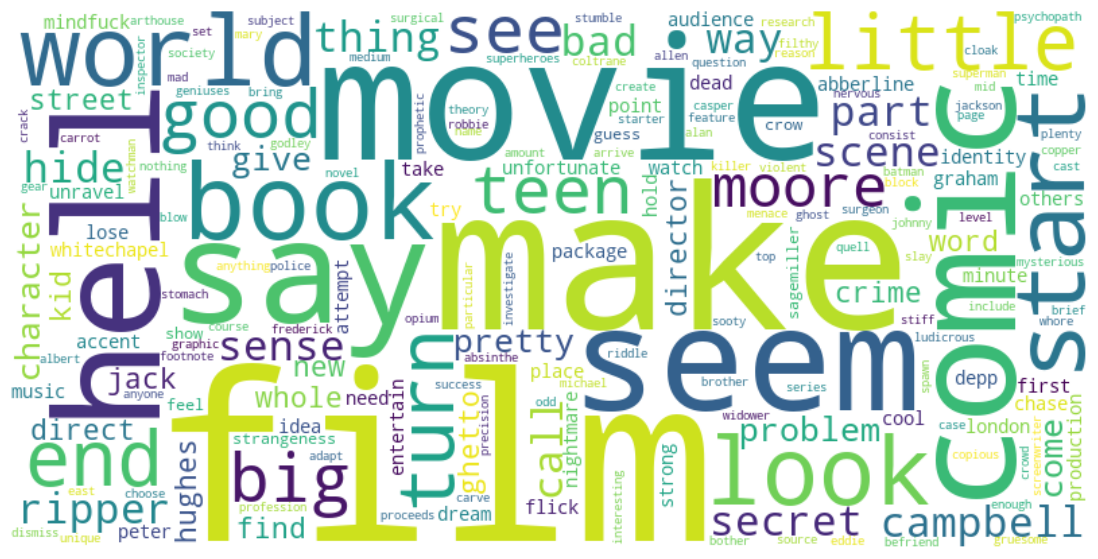

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Model created

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, colormap='viridis').generate(clean_text)

# Plot

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Perform sentiment analysis

# Only first time: nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [14]:
comments = hrtext  # original text lines

In [15]:
sentiments = [] # Dataset

for comment in comments:
    score = sia.polarity_scores(comment)
    sentiments.append(score)

# Examples of 5 first comments
for i, s in enumerate(sentiments[:5]):
    print(f"Comment {i+1}: {s}")

Comment 1: {'neg': 0.165, 'neu': 0.719, 'pos': 0.115, 'compound': -0.5346}
Comment 2: {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'compound': 0.25}
Comment 3: {'neg': 0.073, 'neu': 0.836, 'pos': 0.091, 'compound': 0.1263}
Comment 4: {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'compound': 0.1655}
Comment 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [29]:
from collections import Counter

# Split cleaned text into a list again
word_list = clean_text.split()

# Count frequencies
counter = Counter(word_list)

# Get top 20 words
top_20 = counter.most_common(20)

top_20
# We could use this top 20 for our wordcloud, too.

[('film', 13),
 ('make', 10),
 ('get', 7),
 ('movie', 7),
 ('comic', 5),
 ('hell', 5),
 ('say', 5),
 ('seem', 5),
 ('book', 4),
 ('world', 4),
 ('start', 4),
 ('look', 4),
 ('little', 4),
 ('end', 4),
 ('turn', 4),
 ('good', 4),
 ('see', 4),
 ('big', 4),
 ('teen', 4),
 ('moore', 3)]

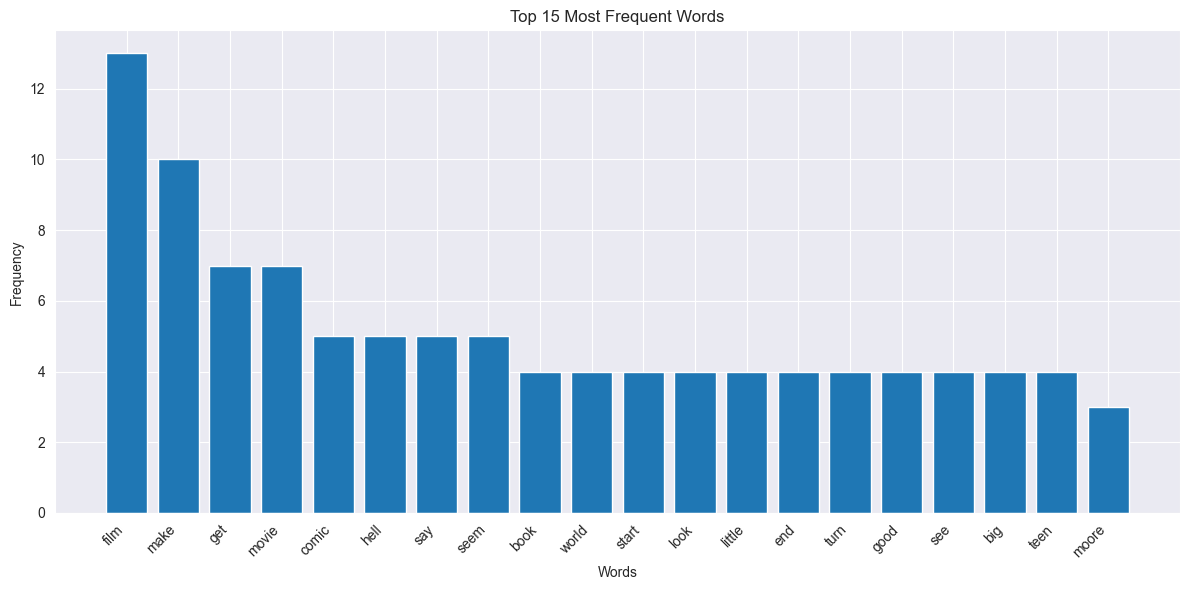

In [30]:
# Separate words and counts
words = [item[0] for item in top_20]
counts = [item[1] for item in top_20]

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 15 Most Frequent Words")
plt.tight_layout()
plt.show()